# CSI Assignment 2

<h2> 1. Description </h2>

The MNIST is a large database of handwritten digits is one of the popular image datasets which has a training set of 60,000 samples and 10,000 test samples used for training various processing systems.<br>

Trainset size: 60,000<br>
Test size: 10,000 

The CIFAR-10 dataset is also a large dataset containing color images of size 32x32 in 10 classes.

Trainset size: 50,000 (5000 points per class x 10 classes = 50,000 points)<br>
Testset size: 10,000  (1000 points per class x 10 classes = 10,000 points)




<h2> 2. Sources/Useful Links</h2>

Source 

The MNIST DATABASE http://yann.lecun.com/exdb/mnist/

The CIFAR-10 dataset https://www.cs.toronto.edu/~kriz/cifar.html



<h2> 3. Mapping the real world problem to an ML problem </h2><br>

The problem is a multiclass classification problem, where for a given image we need to predict:<br><br>
For MNIST dataset: We need to predict the number present on the image <br>

The ten classes and their class labels are as below:<br>
- Image with digit 0 - class '0' 
- Image with digit 1 - class '1'
- Image with digit 2 - class '2'
- Image with digit 3 - class '3'
- Image with digit 4 - class '4'
- Image with digit 5 - class '5'
- Image with digit 6 - class '6'
- Image with digit 7 - class '7'
- Image with digit 8 - class '8'
- Image with digit 9 - class '9'


For CIFAR-10 dataset: We need to predict the class of the image.

- Airplane   - class '0'
- automobile - class '1'
- bird       - class '2'
- cat        - class '3'
- deer       - class '4'
- dog        - class '5'
- frog       - class '6'
- horse      - class '7'
- ship       - class '8'
- truck      - class '9'<br><br>

## 4. Exploratory Data Analysis - MNIST

In [16]:
#importing all the necessary packages
import keras
import numpy as np
from keras.datasets import mnist
from keras.datasets import cifar10


from keras.models import Sequential
from keras.layers import Dense, Dropout,Flatten , Activation
from keras.layers import Conv2D, MaxPooling2D
from keras.layers.normalization import BatchNormalization
from keras.layers import Dropout
from keras import activations


from prettytable import PrettyTable


from keras.initializers import he_normal

import matplotlib.pyplot as plt

Loading the data

In [2]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [27]:
print('The number of datapoints in the training data are:',x_train.shape[0])
print('The number of datapoints in the testing data are:',x_test.shape[0])
print('Each data point is of the size:',x_train.shape[1],",",x_train.shape[2])

The number of datapoints in the training data are: 60000
The number of datapoints in the testing data are: 10000
Each data point is of the size: 28 , 28


In [24]:
#Distribution of class labels across y_train and y_test
print('y_train data distribution \n',np.array(np.unique(y_train, return_counts=True)).T)
print('y_test data distribution \n',np.array(np.unique(y_test, return_counts=True)).T)

y_train data distribution 
 [[   0 5923]
 [   1 6742]
 [   2 5958]
 [   3 6131]
 [   4 5842]
 [   5 5421]
 [   6 5918]
 [   7 6265]
 [   8 5851]
 [   9 5949]]
y_test data distribution 
 [[   0  980]
 [   1 1135]
 [   2 1032]
 [   3 1010]
 [   4  982]
 [   5  892]
 [   6  958]
 [   7 1028]
 [   8  974]
 [   9 1009]]


From the above we can interpret that the data is balanced with approximately 6000 samples per class in training data and 1000 sample in the training data

#### Plotting few Images along with their class labels

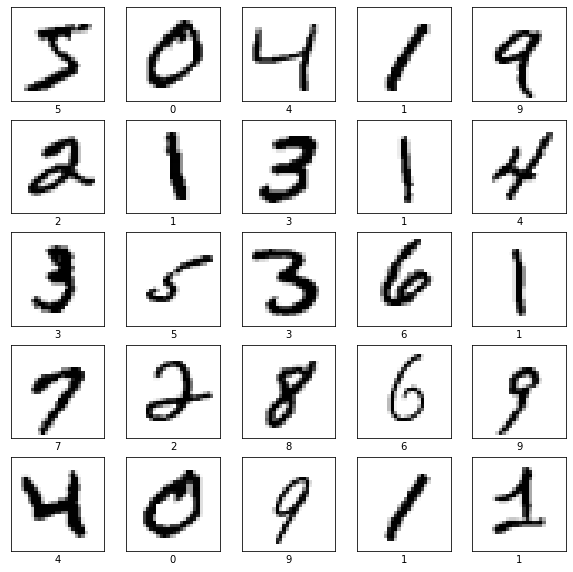

In [21]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i], cmap=plt.cm.binary)
    plt.xlabel(y_train[i])
plt.show()

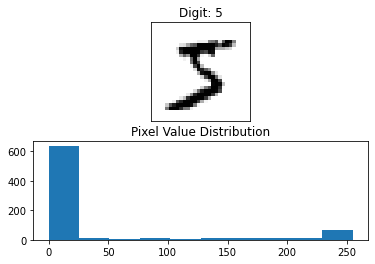

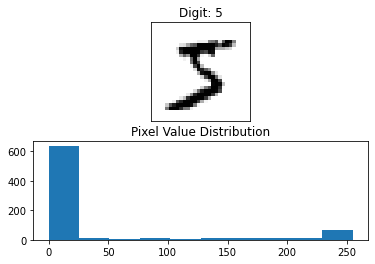

In [6]:
#Pixel distribution of an image
fig = plt.figure()
plt.subplot(2,1,1)
plt.imshow(x_train[0], cmap=plt.cm.binary, interpolation='none')
plt.title("Digit: {}".format(y_train[0]))
plt.xticks([])
plt.yticks([])
plt.subplot(2,1,2)
plt.hist(x_train[0].reshape(784))
plt.title("Pixel Value Distribution")
fig

Since, our images are black and white we can see most of the pixel around the pixel values 0 and 255

In [28]:
print("X_train shape", x_train.shape)
print("y_train shape", y_train.shape)
print("X_test shape", x_test.shape)
print("y_test shape", y_test.shape)

X_train shape (60000, 28, 28)
y_train shape (60000,)
X_test shape (10000, 28, 28)
y_test shape (10000,)


In [29]:
x_train = x_train.reshape(60000,784)  #Converting input to 784 dimensions from 28x28
x_test = x_test.reshape(10000,784)

In [30]:
print('x_train shape',x_train.shape)
print('y_train shape',y_train.shape)
print('x_test shape',x_test.shape)
print('y_test shape',y_test.shape)

x_train shape (60000, 784)
y_train shape (60000,)
x_test shape (10000, 784)
y_test shape (10000,)


In [33]:
#printing some of y class labels
y_train[:5]

array([5, 0, 4, 1, 9], dtype=uint8)

In [35]:
#Converting y class vectors to categorical binary class matrices(One hot encoding)
# Since we have 10 classes we will be converting into a vector of length 10
y_train = keras.utils.to_categorical(y_train, 10)  
y_test = keras.utils.to_categorical(y_test, 10)

In [36]:
#printing some of y class labels after conversion
y_train[:5]

array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]], dtype=float32)

In [38]:
#normalizing the data 
#Dividing each value of the cell by 255 to attain the values in range[0,1]




## 5. Training the models

### Soft-max Regression

In [44]:
model_sm = Sequential() #Initialize the model
#Defining the model
model_sm.add(Dense(num_classes,input_dim = input_dimension,activation = 'softmax')) #To the sequential model we are adding a layer with input dimensions 784 and output as 10 as we have 10 classes

In [45]:
#Compiling the model
model_sm.compile(optimizer='SGD', loss=keras.losses.categorical_crossentropy, metrics=['accuracy'])

#fitting the data to the model
history = model_sm.fit(x_train,y_train,batch_size=batch_size,epochs=50,verbose=1,validation_data=(x_test,y_test))

Epoch 1/50
469/469 [==============================] - 1s 1ms/step - loss: 1.2500 - accuracy: 0.7101 - val_loss: 0.8097 - val_accuracy: 0.8262
Epoch 2/50
469/469 [==============================] - 0s 1ms/step - loss: 0.7172 - accuracy: 0.8354 - val_loss: 0.6099 - val_accuracy: 0.8588
Epoch 3/50
469/469 [==============================] - 0s 1ms/step - loss: 0.5902 - accuracy: 0.8562 - val_loss: 0.5285 - val_accuracy: 0.8715
Epoch 4/50
469/469 [==============================] - 0s 1ms/step - loss: 0.5283 - accuracy: 0.8666 - val_loss: 0.4825 - val_accuracy: 0.8794
Epoch 5/50
469/469 [==============================] - 0s 963us/step - loss: 0.4905 - accuracy: 0.8737 - val_loss: 0.4518 - val_accuracy: 0.8847
Epoch 6/50
469/469 [==============================] - 0s 1ms/step - loss: 0.4643 - accuracy: 0.8786 - val_loss: 0.4304 - val_accuracy: 0.8881
Epoch 7/50
469/469 [==============================] - 0s 949us/step - loss: 0.4449 - accuracy: 0.8827 - val_loss: 0.4140 - val_accuracy: 0.8922
Ep

In [46]:
#Loss and Accuracy
score = model_sm.evaluate(x_test,y_test,verbose=1)
print('Test score:',score[0])
print('Test Accuracy:',score[1])

313/313 [==============================] - 0s 491us/step - loss: 0.2982 - accuracy: 0.9179
Test score: 0.29822513461112976
Test Accuracy: 0.917900025844574


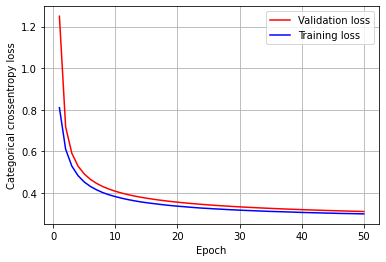

In [48]:
#Plot of training loss and validation loss
fig , ax = plt.subplots(1,1)
ax.set_xlabel('Epoch')
ax.set_ylabel('Categorical crossentropy loss')

x = list(range(1,51))

validation_loss = history.history['val_loss']
training_loss = history.history['loss']
ax.plot(x,training_loss,'r',label = 'Validation loss')
ax.plot(x,validation_loss,'b',label = 'Training loss')
plt.legend()
plt.grid()

In [51]:
mnist_table = PrettyTable()

mnist_table.field_names = ["Model","#Layers","Activation","optimizer","Epochs","Accuracy","Training Error","Validation error",]

In [52]:
mnist_table.add_row(["Softmax Regression",0,"Softmax","SGD",50,0.917,0.309,0.298])
print(mnist_table)

+--------------------+---------+------------+-----------+--------+----------+----------------+------------------+
|       Model        | #Layers | Activation | optimizer | Epochs | Accuracy | Training Error | Validation error |
+--------------------+---------+------------+-----------+--------+----------+----------------+------------------+
| Softmax Regression |    0    |  Softmax   |    SGD    |   50   |  0.917   |     0.309      |      0.298       |
+--------------------+---------+------------+-----------+--------+----------+----------------+------------------+


#### <font color='green'>With a simple softmax model we attained an accuracy of 0.92 with train loss of 0.3 and validation loss of 0.29</font>

#### Changing the optimizer to ADAM and training the model on same dataset

In [53]:
model_adam_sm =Sequential()

model_adam_sm.add(Dense(num_classes,input_dim = input_dimension,activation = 'softmax'))

#Using adam optimizer
model_adam_sm.compile(optimizer='Adam',loss=keras.losses.categorical_crossentropy,metrics=['accuracy'])

history = model_adam_sm.fit(x_train,y_train,epochs = epochs,verbose = 1, validation_data = (x_test,y_test))

Epoch 1/20
1875/1875 [==============================] - 1s 722us/step - loss: 0.4755 - accuracy: 0.8750 - val_loss: 0.3101 - val_accuracy: 0.9142
Epoch 2/20
1875/1875 [==============================] - 1s 671us/step - loss: 0.3038 - accuracy: 0.9151 - val_loss: 0.2805 - val_accuracy: 0.9229
Epoch 3/20
1875/1875 [==============================] - 2s 859us/step - loss: 0.2835 - accuracy: 0.9208 - val_loss: 0.2736 - val_accuracy: 0.9237
Epoch 4/20
1875/1875 [==============================] - 1s 685us/step - loss: 0.2726 - accuracy: 0.9238 - val_loss: 0.2726 - val_accuracy: 0.9226
Epoch 5/20
1875/1875 [==============================] - 1s 676us/step - loss: 0.2662 - accuracy: 0.9259 - val_loss: 0.2667 - val_accuracy: 0.9256
Epoch 6/20
1875/1875 [==============================] - 1s 770us/step - loss: 0.2619 - accuracy: 0.9271 - val_loss: 0.2636 - val_accuracy: 0.9269
Epoch 7/20
1875/1875 [==============================] - 1s 648us/step - loss: 0.2587 - accuracy: 0.9285 - val_loss: 0.2636 -

In [54]:
score = model_adam_sm.evaluate(x_test,y_test,verbose=1)
print('Test score:',score[0])
print('Test Accuracy:',score[1])

313/313 [==============================] - 0s 532us/step - loss: 0.2715 - accuracy: 0.9274
Test score: 0.27151089906692505
Test Accuracy: 0.9273999929428101


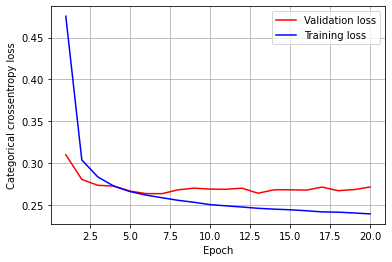

In [55]:
fig , ax = plt.subplots(1,1)
ax.set_xlabel('Epoch')
ax.set_ylabel('Categorical crossentropy loss')

x = list(range(1,epochs+1))

vy = history.history['val_loss']
ty = history.history['loss']
ax.plot(x,vy,'r',label = 'Validation loss')
ax.plot(x,ty,'b',label = 'Training loss')
plt.legend()
plt.grid()

In [60]:
mnist_table.add_row(["Softmax Regression",0,"Softmax","ADAM",4,0.92,0.27,0.27])
print(mnist_table)

+--------------------+---------+------------+-----------+--------+----------+----------------+------------------+
|       Model        | #Layers | Activation | optimizer | Epochs | Accuracy | Training Error | Validation error |
+--------------------+---------+------------+-----------+--------+----------+----------------+------------------+
| Softmax Regression |    0    |  Softmax   |    SGD    |   50   |  0.917   |     0.309      |      0.298       |
| Softmax Regression |    0    |  Softmax   |    ADAM   |   4    |   0.92   |      0.27      |       0.27       |
+--------------------+---------+------------+-----------+--------+----------+----------------+------------------+


#### <font color='green'>With a simple softmax model with adam optimzer we attained an accuracy of 0.92 with train loss of 0.27 and validation loss of 0.27 in just 4 epochs, after that the model starts to overfit on the data</font>

 <h2> MLP - MNIST</h2>
 <h3>  MLP - (784 - 512 - 128 - 10) with Sigmoid activation  and SGDOptimizer) </h3>

In [65]:
# MLP (784 - 512 - 128 - 10)

model_sigmoid = Sequential()
#Adding Layer 1 with activation Sigmoid (784 - 512)
model_sigmoid.add(Dense(512, activation='sigmoid', input_shape=(input_dimension,)))
#Adding Layer 2 with 128 units and activation Sigmoid (512 - 128)
model_sigmoid.add(Dense(128, activation='sigmoid'))
#Output Layer with 10 units and activation is softmax (128 - 10)
model_sigmoid.add(Dense(num_classes, activation='softmax'))

model_sigmoid.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_10 (Dense)             (None, 512)               401920    
_________________________________________________________________
dense_11 (Dense)             (None, 128)               65664     
_________________________________________________________________
dense_12 (Dense)             (None, 10)                1290      
Total params: 468,874
Trainable params: 468,874
Non-trainable params: 0
_________________________________________________________________


In [66]:
model_sigmoid.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])

history = model_sigmoid.fit(x_train,y_train, batch_size=batch_size, epochs=80, verbose=1, validation_data=(x_test, y_test))

Epoch 1/80
469/469 [==============================] - 2s 3ms/step - loss: 2.2738 - accuracy: 0.2354 - val_loss: 2.2252 - val_accuracy: 0.3751
Epoch 2/80
469/469 [==============================] - 2s 3ms/step - loss: 2.1829 - accuracy: 0.4512 - val_loss: 2.1308 - val_accuracy: 0.4200
Epoch 3/80
469/469 [==============================] - 2s 4ms/step - loss: 2.0714 - accuracy: 0.5451 - val_loss: 1.9954 - val_accuracy: 0.6105
Epoch 4/80
469/469 [==============================] - 2s 3ms/step - loss: 1.9126 - accuracy: 0.6066 - val_loss: 1.8059 - val_accuracy: 0.6383
Epoch 5/80
469/469 [==============================] - 2s 3ms/step - loss: 1.7038 - accuracy: 0.6488 - val_loss: 1.5772 - val_accuracy: 0.6783
Epoch 6/80
469/469 [==============================] - 2s 3ms/step - loss: 1.4740 - accuracy: 0.6924 - val_loss: 1.3492 - val_accuracy: 0.7220
Epoch 7/80
469/469 [==============================] - 2s 3ms/step - loss: 1.2640 - accuracy: 0.7318 - val_loss: 1.1570 - val_accuracy: 0.7624
Epoch 

In [67]:
score = model_sigmoid.evaluate(x_test,y_test) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

313/313 [==============================] - 0s 1ms/step - loss: 0.2795 - accuracy: 0.9177
Test score: 0.2795198857784271
Test accuracy: 0.9176999926567078


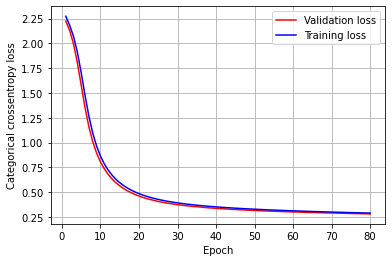

In [68]:
fig , ax = plt.subplots(1,1)
ax.set_xlabel('Epoch')
ax.set_ylabel('Categorical crossentropy loss')

x = list(range(1,81))

vy = history.history['val_loss']
ty = history.history['loss']
ax.plot(x,vy,'r',label = 'Validation loss')
ax.plot(x,ty,'b',label = 'Training loss')
plt.legend()
plt.grid()

In [71]:
mnist_table.add_row(["MLP",2,"Sigmoid","SGD",80,0.917,0.288,0.277])
print(mnist_table)

+--------------------+---------+------------+-----------+--------+----------+----------------+------------------+
|       Model        | #Layers | Activation | optimizer | Epochs | Accuracy | Training Error | Validation error |
+--------------------+---------+------------+-----------+--------+----------+----------------+------------------+
| Softmax Regression |    0    |  Softmax   |    SGD    |   50   |  0.917   |     0.309      |      0.298       |
| Softmax Regression |    0    |  Softmax   |    ADAM   |   4    |   0.92   |      0.27      |       0.27       |
|        MLP         |    2    |  Sigmoid   |    SGD    |   80   |  0.917   |     0.288      |      0.277       |
+--------------------+---------+------------+-----------+--------+----------+----------------+------------------+


#### <font color='green'>With a MLP model with sigmoid activation and SGD optimzer we attained an accuracy of 0.917 with train loss of 0.288 and validation loss of 0.277 it took us 80 epochs</font>

<h3>  MLP - (784 - 512 -256 - 128 - 10) with Sigmoid activation  and SGDOptimizer) </h3>

In [74]:
model_sigmoid_2 = Sequential()

#Layer 1
model_sigmoid_2.add(Dense(512,input_shape = (input_dimension,),activation='sigmoid'))

#Layer 2
model_sigmoid_2.add(Dense(256,activation='sigmoid'))

#Layer 3
model_sigmoid_2.add(Dense(128,activation = 'sigmoid'))

#Output Layer
model_sigmoid_2.add(Dense(num_classes,activation='softmax'))

model_sigmoid_2.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_17 (Dense)             (None, 512)               401920    
_________________________________________________________________
dense_18 (Dense)             (None, 256)               131328    
_________________________________________________________________
dense_19 (Dense)             (None, 128)               32896     
_________________________________________________________________
dense_20 (Dense)             (None, 10)                1290      
Total params: 567,434
Trainable params: 567,434
Non-trainable params: 0
_________________________________________________________________


In [75]:
model_sigmoid_2.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])

history = model_sigmoid_2.fit(x_train, y_train, batch_size=batch_size, epochs=80, verbose=1, validation_data=(x_test, y_test))

Epoch 1/80
469/469 [==============================] - 2s 4ms/step - loss: 2.3051 - accuracy: 0.1140 - val_loss: 2.2941 - val_accuracy: 0.1135
Epoch 2/80
469/469 [==============================] - 2s 4ms/step - loss: 2.2913 - accuracy: 0.1258 - val_loss: 2.2868 - val_accuracy: 0.1135
Epoch 3/80
469/469 [==============================] - 2s 4ms/step - loss: 2.2841 - accuracy: 0.1466 - val_loss: 2.2794 - val_accuracy: 0.1310
Epoch 4/80
469/469 [==============================] - 2s 4ms/step - loss: 2.2762 - accuracy: 0.1598 - val_loss: 2.2702 - val_accuracy: 0.1294
Epoch 5/80
469/469 [==============================] - 2s 4ms/step - loss: 2.2665 - accuracy: 0.2013 - val_loss: 2.2598 - val_accuracy: 0.1665
Epoch 6/80
469/469 [==============================] - 2s 4ms/step - loss: 2.2548 - accuracy: 0.2519 - val_loss: 2.2464 - val_accuracy: 0.2203
Epoch 7/80
469/469 [==============================] - 2s 4ms/step - loss: 2.2396 - accuracy: 0.2940 - val_loss: 2.2295 - val_accuracy: 0.4072
Epoch 

In [76]:
score = model_sigmoid_2.evaluate(x_test,y_test) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

313/313 [==============================] - 0s 1ms/step - loss: 0.3341 - accuracy: 0.9023
Test score: 0.33407697081565857
Test accuracy: 0.9023000001907349


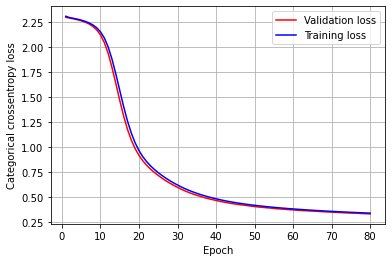

In [78]:
fig , ax = plt.subplots(1,1)
ax.set_xlabel('Epoch')
ax.set_ylabel('Categorical crossentropy loss')

x = list(range(1,81))

vy = history.history['val_loss']
ty = history.history['loss']
ax.plot(x,vy,'r',label = 'Validation loss')
ax.plot(x,ty,'b',label = 'Training loss')
plt.legend()
plt.grid()

In [79]:
mnist_table.add_row(["MLP",3,"Sigmoid","SGD",80,0.90,0.34,0.33])
print(mnist_table)

+--------------------+---------+------------+-----------+--------+----------+----------------+------------------+
|       Model        | #Layers | Activation | optimizer | Epochs | Accuracy | Training Error | Validation error |
+--------------------+---------+------------+-----------+--------+----------+----------------+------------------+
| Softmax Regression |    0    |  Softmax   |    SGD    |   50   |  0.917   |     0.309      |      0.298       |
| Softmax Regression |    0    |  Softmax   |    ADAM   |   4    |   0.92   |      0.27      |       0.27       |
|        MLP         |    2    |  Sigmoid   |    SGD    |   80   |  0.917   |     0.288      |      0.277       |
|        MLP         |    3    |  Sigmoid   |    SGD    |   80   |   0.9    |      0.34      |       0.33       |
+--------------------+---------+------------+-----------+--------+----------+----------------+------------------+


#### <font color='green'> Adding an extra layer didn't help in reducing the accuracy </font>

<h3>  MLP - (784 - 512 -256 - 128 - 10) with Sigmoid activation  and ADAM Optimizer) </h3>

In [81]:
#Initializing model

model_sigmoid_adam = Sequential()

#Layer 1
model_sigmoid_adam.add(Dense(512,input_shape = (input_dimension,),activation = 'sigmoid'))

#Layer 2
model_sigmoid_adam.add(Dense(256,activation='sigmoid'))

#Layer 3
model_sigmoid_adam.add(Dense(128,activation='sigmoid'))

#Output Layer
model_sigmoid_adam.add(Dense(num_classes,activation='softmax'))

model_sigmoid_adam.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_21 (Dense)             (None, 512)               401920    
_________________________________________________________________
dense_22 (Dense)             (None, 256)               131328    
_________________________________________________________________
dense_23 (Dense)             (None, 128)               32896     
_________________________________________________________________
dense_24 (Dense)             (None, 10)                1290      
Total params: 567,434
Trainable params: 567,434
Non-trainable params: 0
_________________________________________________________________


In [82]:
#compiling and fitting the model

model_sigmoid_adam.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

history = model_sigmoid_adam.fit(x_train,y_train,batch_size=batch_size,epochs=epochs,validation_data=(x_test,y_test),verbose=1)

Epoch 1/20
469/469 [==============================] - 2s 5ms/step - loss: 0.6050 - accuracy: 0.8260 - val_loss: 0.2508 - val_accuracy: 0.9265
Epoch 2/20
469/469 [==============================] - 2s 4ms/step - loss: 0.2063 - accuracy: 0.9391 - val_loss: 0.1713 - val_accuracy: 0.9477
Epoch 3/20
469/469 [==============================] - 2s 4ms/step - loss: 0.1442 - accuracy: 0.9572 - val_loss: 0.1466 - val_accuracy: 0.9560
Epoch 4/20
469/469 [==============================] - 2s 4ms/step - loss: 0.1094 - accuracy: 0.9671 - val_loss: 0.1135 - val_accuracy: 0.9655
Epoch 5/20
469/469 [==============================] - 2s 4ms/step - loss: 0.0859 - accuracy: 0.9737 - val_loss: 0.0982 - val_accuracy: 0.9700
Epoch 6/20
469/469 [==============================] - 2s 5ms/step - loss: 0.0684 - accuracy: 0.9796 - val_loss: 0.0837 - val_accuracy: 0.9746
Epoch 7/20
469/469 [==============================] - 2s 5ms/step - loss: 0.0551 - accuracy: 0.9830 - val_loss: 0.0821 - val_accuracy: 0.9744
Epoch 

In [83]:
score = model_sigmoid_adam.evaluate(x_test,y_test) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

313/313 [==============================] - 0s 1ms/step - loss: 0.0926 - accuracy: 0.9786
Test score: 0.0925731435418129
Test accuracy: 0.978600025177002


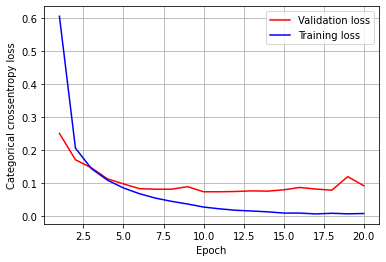

In [84]:
fig , ax = plt.subplots(1,1)
ax.set_xlabel('Epoch')
ax.set_ylabel('Categorical crossentropy loss')

x = list(range(1,epochs+1))

vy = history.history['val_loss']
ty = history.history['loss']
ax.plot(x,vy,'r',label = 'Validation loss')
ax.plot(x,ty,'b',label = 'Training loss')
plt.legend()
plt.grid()

In [89]:
mnist_table.add_row(["MLP",3,"Sigmoid","Adam",3,0.95,0.14,0.14])
print(mnist_table)

+--------------------+---------+------------+-----------+--------+----------+----------------+------------------+
|       Model        | #Layers | Activation | optimizer | Epochs | Accuracy | Training Error | Validation error |
+--------------------+---------+------------+-----------+--------+----------+----------------+------------------+
| Softmax Regression |    0    |  Softmax   |    SGD    |   50   |  0.917   |     0.309      |      0.298       |
| Softmax Regression |    0    |  Softmax   |    ADAM   |   4    |   0.92   |      0.27      |       0.27       |
|        MLP         |    2    |  Sigmoid   |    SGD    |   80   |  0.917   |     0.288      |      0.277       |
|        MLP         |    3    |  Sigmoid   |    SGD    |   80   |   0.9    |      0.34      |       0.33       |
|        MLP         |    3    |  Sigmoid   |    Adam   |   3    |   0.95   |      0.14      |       0.14       |
+--------------------+---------+------------+-----------+--------+----------+-----------

#### <font color='green'>We can see a dractic change in the results, using MLP with sigmoid activation and adam optimizer we attain 0.95 accuracy with 0.14 train error and 0.14 validation error </font>

<h3>  MLP - (784 - 512 -256 - 128 - 10) with ReLu activation  and SGD) </h3>

In [90]:
#initialize the model


model_relu = Sequential()

#Layer 1 
model_relu.add(Dense(512,input_shape = (input_dimension,),activation = 'relu',kernel_initializer = he_normal(seed = 1)))

#Layer 2 
model_relu.add(Dense(256,activation = 'relu',kernel_initializer= he_normal(seed = 1)))

#Layer 3
model_relu.add(Dense(128,activation = 'relu',kernel_initializer = he_normal(seed = 1)))

#output Layer 
model_relu.add(Dense(num_classes,activation = 'softmax'))

            

In [91]:
model_relu.summary()

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_25 (Dense)             (None, 512)               401920    
_________________________________________________________________
dense_26 (Dense)             (None, 256)               131328    
_________________________________________________________________
dense_27 (Dense)             (None, 128)               32896     
_________________________________________________________________
dense_28 (Dense)             (None, 10)                1290      
Total params: 567,434
Trainable params: 567,434
Non-trainable params: 0
_________________________________________________________________


In [92]:
#Compilint and fitting the data into the model
model_relu.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])

history = model_relu.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, verbose=1, validation_data=(x_test, y_test))

Epoch 1/20
469/469 [==============================] - 2s 4ms/step - loss: 0.9245 - accuracy: 0.7669 - val_loss: 0.4126 - val_accuracy: 0.8887
Epoch 2/20
469/469 [==============================] - 2s 4ms/step - loss: 0.3607 - accuracy: 0.8995 - val_loss: 0.3063 - val_accuracy: 0.9139
Epoch 3/20
469/469 [==============================] - 2s 4ms/step - loss: 0.2911 - accuracy: 0.9171 - val_loss: 0.2631 - val_accuracy: 0.9250
Epoch 4/20
469/469 [==============================] - 2s 4ms/step - loss: 0.2543 - accuracy: 0.9274 - val_loss: 0.2336 - val_accuracy: 0.9335
Epoch 5/20
469/469 [==============================] - 2s 4ms/step - loss: 0.2286 - accuracy: 0.9347 - val_loss: 0.2143 - val_accuracy: 0.9395
Epoch 6/20
469/469 [==============================] - 2s 4ms/step - loss: 0.2083 - accuracy: 0.9403 - val_loss: 0.1982 - val_accuracy: 0.9443
Epoch 7/20
469/469 [==============================] - 2s 4ms/step - loss: 0.1920 - accuracy: 0.9453 - val_loss: 0.1861 - val_accuracy: 0.9454
Epoch 

In [93]:
score = model_relu.evaluate(x_test,y_test) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

313/313 [==============================] - 0s 1ms/step - loss: 0.1085 - accuracy: 0.9680
Test score: 0.10846135020256042
Test accuracy: 0.9679999947547913


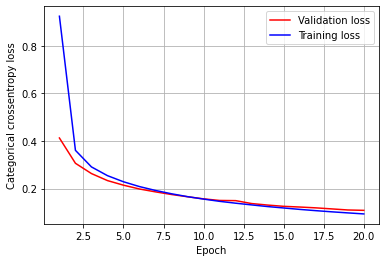

In [94]:
fig , ax = plt.subplots(1,1)
ax.set_xlabel('Epoch')
ax.set_ylabel('Categorical crossentropy loss')

x = list(range(1,epochs+1))

vy = history.history['val_loss']
ty = history.history['loss']
ax.plot(x,vy,'r',label = 'Validation loss')
ax.plot(x,ty,'b',label = 'Training loss')
plt.legend()
plt.grid()

In [106]:
mnist_table.add_row(["MLP",3,"ReLu","SGD",20,0.97,0.09,0.10])
print(mnist_table)

+--------------------+---------+------------+-----------+--------+----------+----------------+------------------+
|       Model        | #Layers | Activation | optimizer | Epochs | Accuracy | Training Error | Validation error |
+--------------------+---------+------------+-----------+--------+----------+----------------+------------------+
| Softmax Regression |    0    |  Softmax   |    SGD    |   50   |  0.917   |     0.309      |      0.298       |
| Softmax Regression |    0    |  Softmax   |    ADAM   |   4    |   0.92   |      0.27      |       0.27       |
|        MLP         |    2    |  Sigmoid   |    SGD    |   80   |  0.917   |     0.288      |      0.277       |
|        MLP         |    3    |  Sigmoid   |    SGD    |   80   |   0.9    |      0.34      |       0.33       |
|        MLP         |    3    |  Sigmoid   |    Adam   |   3    |   0.95   |      0.14      |       0.14       |
|        MLP         |    3    |    ReLu    |    SGD    |   20   |   0.97   |      0.09 

#### <font color='green'>We can see a change in the results from the previous model, using MLP with ReLu activation and SGD optimizer we attain 0.97 accuracy with 0.09 train error and 0.1 validation error </font>

<h3>  MLP - (784 - 512 -256 - 128 - 10) with ReLu activation  and Adam optimizer </h3>

In [99]:
#initialize the model

model_relu_adam = Sequential()

#Layer 1 
model_relu_adam.add(Dense(512,input_shape = (input_dimension,),activation = 'relu',kernel_initializer = he_normal(seed = 1)))

#Layer 2 
model_relu_adam.add(Dense(256,activation = 'relu',kernel_initializer= he_normal(seed = 1)))

#Layer 3
model_relu_adam.add(Dense(128,activation = 'relu',kernel_initializer = he_normal(seed = 1)))

#output Layer 
model_relu_adam.add(Dense(num_classes,activation = 'softmax'))

model_relu_adam.summary()

#Compiling and fitting the data into the model

model_relu_adam.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model_relu_adam.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, verbose=1, validation_data=(x_test, y_test))


Model: "sequential_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_37 (Dense)             (None, 512)               401920    
_________________________________________________________________
dense_38 (Dense)             (None, 256)               131328    
_________________________________________________________________
dense_39 (Dense)             (None, 128)               32896     
_________________________________________________________________
dense_40 (Dense)             (None, 10)                1290      
Total params: 567,434
Trainable params: 567,434
Non-trainable params: 0
_________________________________________________________________
Epoch 1/20
469/469 [==============================] - 2s 5ms/step - loss: 0.2212 - accuracy: 0.9345 - val_loss: 0.1054 - val_accuracy: 0.9675
Epoch 2/20
469/469 [==============================] - 2s 5ms/step - loss: 0.0810 - accuracy: 0.9748 - v

In [100]:
score = model_relu_adam.evaluate(x_test,y_test) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

313/313 [==============================] - 0s 1ms/step - loss: 0.0996 - accuracy: 0.9811
Test score: 0.09955291450023651
Test accuracy: 0.9811000227928162


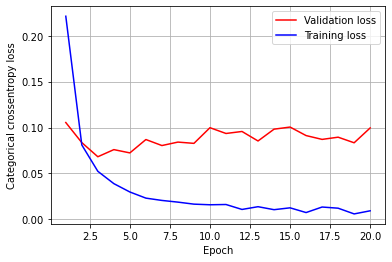

In [101]:
fig , ax = plt.subplots(1,1)
ax.set_xlabel('Epoch')
ax.set_ylabel('Categorical crossentropy loss')

x = list(range(1,epochs+1))

vy = history.history['val_loss']
ty = history.history['loss']
ax.plot(x,vy,'r',label = 'Validation loss')
ax.plot(x,ty,'b',label = 'Training loss')
plt.legend()
plt.grid()

In [107]:
mnist_table.add_row(["MLP",3,"ReLu","ADAM",3,0.983,0.05,0.06])
print(mnist_table)

+--------------------+---------+------------+-----------+--------+----------+----------------+------------------+
|       Model        | #Layers | Activation | optimizer | Epochs | Accuracy | Training Error | Validation error |
+--------------------+---------+------------+-----------+--------+----------+----------------+------------------+
| Softmax Regression |    0    |  Softmax   |    SGD    |   50   |  0.917   |     0.309      |      0.298       |
| Softmax Regression |    0    |  Softmax   |    ADAM   |   4    |   0.92   |      0.27      |       0.27       |
|        MLP         |    2    |  Sigmoid   |    SGD    |   80   |  0.917   |     0.288      |      0.277       |
|        MLP         |    3    |  Sigmoid   |    SGD    |   80   |   0.9    |      0.34      |       0.33       |
|        MLP         |    3    |  Sigmoid   |    Adam   |   3    |   0.95   |      0.14      |       0.14       |
|        MLP         |    3    |    ReLu    |    SGD    |   20   |   0.97   |      0.09 

#### <font color='green'> We can see a change in the results from the previous model, using MLP with ReLu activation and adam optimizer we attain 0.98 accuracy with 0.009 train error and 0.1 validation error </font>

#### We can interpret that the model is overfitting, one solution for this is use drop outs or reduce the number of layers layers

<h3>  MLP - (784 - 512 -256 - 128 - 10) with Batch Normalization, ReLu activation  and Adam optimizer </h3>

In [108]:
#initialize the model


model_batch = Sequential()

#Layer 1 
model_batch.add(Dense(512,input_shape = (input_dimension,),activation = 'relu',kernel_initializer = he_normal(seed = 1)))
#Adding Batch normalization
model_batch.add(BatchNormalization())


#Layer 2 
model_batch.add(Dense(256,activation = 'relu',kernel_initializer= he_normal(seed = 1)))
#Adding Batch normalization
model_batch.add(BatchNormalization())


#Layer 3
model_batch.add(Dense(128,activation = 'relu',kernel_initializer = he_normal(seed = 1)))
#Adding Batch normalization
model_batch.add(BatchNormalization())

#output Layer 
model_batch.add(Dense(num_classes,activation = 'softmax'))

model_batch.summary()

#Compiling and fitting the data into the model

model_batch.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model_batch.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, verbose=1, validation_data=(x_test, y_test))


Model: "sequential_14"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_41 (Dense)             (None, 512)               401920    
_________________________________________________________________
batch_normalization (BatchNo (None, 512)               2048      
_________________________________________________________________
dense_42 (Dense)             (None, 256)               131328    
_________________________________________________________________
batch_normalization_1 (Batch (None, 256)               1024      
_________________________________________________________________
dense_43 (Dense)             (None, 128)               32896     
_________________________________________________________________
batch_normalization_2 (Batch (None, 128)               512       
_________________________________________________________________
dense_44 (Dense)             (None, 10)              

313/313 [==============================] - 0s 1ms/step - loss: 0.0955 - accuracy: 0.9781
Test score: 0.09552614390850067
Test accuracy: 0.9781000018119812


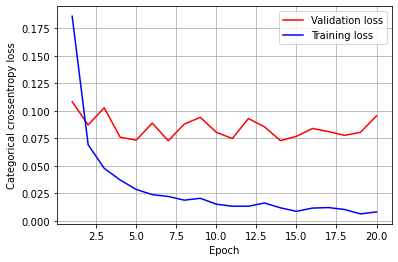

In [109]:
score = model_batch.evaluate(x_test,y_test) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])


fig , ax = plt.subplots(1,1)
ax.set_xlabel('Epoch')
ax.set_ylabel('Categorical crossentropy loss')

x = list(range(1,epochs+1))

vy = history.history['val_loss']
ty = history.history['loss']
ax.plot(x,vy,'r',label = 'Validation loss')
ax.plot(x,ty,'b',label = 'Training loss')
plt.legend()
plt.grid()

In [110]:
mnist_table.add_row(["MLP-Batch Normalization",3,"ReLu","ADAM",2,0.978,0.07,0.08])
print(mnist_table)

+-------------------------+---------+------------+-----------+--------+----------+----------------+------------------+
|          Model          | #Layers | Activation | optimizer | Epochs | Accuracy | Training Error | Validation error |
+-------------------------+---------+------------+-----------+--------+----------+----------------+------------------+
|    Softmax Regression   |    0    |  Softmax   |    SGD    |   50   |  0.917   |     0.309      |      0.298       |
|    Softmax Regression   |    0    |  Softmax   |    ADAM   |   4    |   0.92   |      0.27      |       0.27       |
|           MLP           |    2    |  Sigmoid   |    SGD    |   80   |  0.917   |     0.288      |      0.277       |
|           MLP           |    3    |  Sigmoid   |    SGD    |   80   |   0.9    |      0.34      |       0.33       |
|           MLP           |    3    |  Sigmoid   |    Adam   |   3    |   0.95   |      0.14      |       0.14       |
|           MLP           |    3    |    ReLu   

#### <font color='green'> By introducting batch normalization we attain an accuracy of 0.98 approx in just two epoch with training loss of 0.07 and test loss of 0.08 </font>

<h3>  MLP - (784 - 512 -256 - 128 - 10) with Batch Normalization, Dropout, ReLu activation  and Adam optimizer </h3>

In [112]:
#initialize the model


model_batch_drop = Sequential()

#Layer 1 
model_batch_drop.add(Dense(512,input_shape = (input_dimension,),activation = 'relu',kernel_initializer = he_normal(seed = 1)))
#Adding Batch normalization
model_batch_drop.add(BatchNormalization())
#Adding Dropout layer
model_batch_drop.add(Dropout(0.5))


#Layer 2 
model_batch_drop.add(Dense(256,activation = 'relu',kernel_initializer= he_normal(seed = 1)))
#Adding Batch normalization
model_batch_drop.add(BatchNormalization())
#Adding Dropout layer
model_batch_drop.add(Dropout(0.5))


#Layer 3
model_batch_drop.add(Dense(128,activation = 'relu',kernel_initializer = he_normal(seed = 1)))
#Adding Batch normalization
model_batch_drop.add(BatchNormalization())
#Adding Dropout layer
model_batch_drop.add(Dropout(0.5))

#output Layer 
model_batch_drop.add(Dense(num_classes,activation = 'softmax'))

model_batch_drop.summary()

#Compiling and fitting the data into the model

model_batch_drop.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model_batch_drop.fit(x_train, y_train, batch_size=batch_size, epochs=40, verbose=1, validation_data=(x_test, y_test))


Model: "sequential_15"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_45 (Dense)             (None, 512)               401920    
_________________________________________________________________
batch_normalization_3 (Batch (None, 512)               2048      
_________________________________________________________________
dropout (Dropout)            (None, 512)               0         
_________________________________________________________________
dense_46 (Dense)             (None, 256)               131328    
_________________________________________________________________
batch_normalization_4 (Batch (None, 256)               1024      
_________________________________________________________________
dropout_1 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_47 (Dense)             (None, 128)             

313/313 [==============================] - 0s 1ms/step - loss: 0.0596 - accuracy: 0.9831
Test score: 0.05962451174855232
Test accuracy: 0.9830999970436096


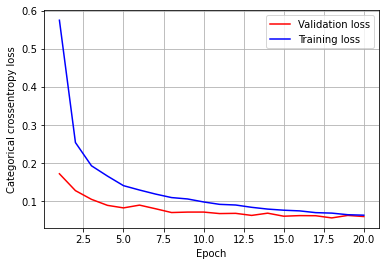

In [72]:
score = model_batch_drop.evaluate(x_test,y_test) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])


fig , ax = plt.subplots(1,1)
ax.set_xlabel('Epoch')
ax.set_ylabel('Categorical crossentropy loss')

x = list(range(1,41))

vy = history.history['val_loss']
ty = history.history['loss']
ax.plot(x,vy,'r',label = 'Validation loss')
ax.plot(x,ty,'b',label = 'Training loss')
plt.legend()
plt.grid()

In [113]:
mnist_table.add_row(["MLP-BN-Dropout ",3,"ReLu","ADAM",25,0.983,0.052,0.051])
print(mnist_table)

+-------------------------+---------+------------+-----------+--------+----------+----------------+------------------+
|          Model          | #Layers | Activation | optimizer | Epochs | Accuracy | Training Error | Validation error |
+-------------------------+---------+------------+-----------+--------+----------+----------------+------------------+
|    Softmax Regression   |    0    |  Softmax   |    SGD    |   50   |  0.917   |     0.309      |      0.298       |
|    Softmax Regression   |    0    |  Softmax   |    ADAM   |   4    |   0.92   |      0.27      |       0.27       |
|           MLP           |    2    |  Sigmoid   |    SGD    |   80   |  0.917   |     0.288      |      0.277       |
|           MLP           |    3    |  Sigmoid   |    SGD    |   80   |   0.9    |      0.34      |       0.33       |
|           MLP           |    3    |  Sigmoid   |    Adam   |   3    |   0.95   |      0.14      |       0.14       |
|           MLP           |    3    |    ReLu   

#### <font color='green'> By introducting batch normalization and dropouts we did see a better model as we attained an accuracy of 0.983 with training loss of 0.052 and test loss of 0.051 </font>

## CNN

### CNN on MNIST

In [115]:
#We will be inputing the image directly (28 pixels x 28 pixels) instead of converting into 784 pixels.
(x_train, y_train), (x_test, y_test) = mnist.load_data()
print("The shape of x_train is ",x_train.shape)
print("The shape of y_train is ",y_train.shape)
print("The shape of x_test is ",x_test.shape)
print("The shape of y_test is ",y_test.shape)



# input image dimensions
img_rows, img_cols = 28, 28

if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)
    
    
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

The shape of x_train is  (60000, 28, 28)
The shape of y_train is  (60000,)
The shape of x_test is  (10000, 28, 28)
The shape of y_test is  (10000,)
x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


In [122]:
model = Sequential()
#Adding a convolution layer 1
model.add(Conv2D(32, kernel_size=(3, 3),activation='relu',input_shape=input_shape))
#Layer 2
model.add(Conv2D(64, (3, 3), activation='relu'))
#Adding an max pooling layer
model.add(MaxPooling2D(pool_size=(2, 2)))
#Adding dropout layer
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

#Compiling the model
model.compile(loss=keras.losses.categorical_crossentropy,optimizer=keras.optimizers.Adam(),metrics=['accuracy'])

#Fitting the data on to the model 
history = model.fit(x_train, y_train,batch_size=batch_size,epochs=30,verbose=1,validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Epoch 1/30
469/469 [==============================] - 97s 207ms/step - loss: 0.2540 - accuracy: 0.9222 - val_loss: 0.0486 - val_accuracy: 0.9836
Epoch 2/30
469/469 [==============================] - 100s 213ms/step - loss: 0.0914 - accuracy: 0.9736 - val_loss: 0.0439 - val_accuracy: 0.9852
Epoch 3/30
469/469 [==============================] - 98s 209ms/step - loss: 0.0681 - accuracy: 0.9794 - val_loss: 0.0393 - val_accuracy: 0.9874
Epoch 4/30
469/469 [==============================] - 97s 208ms/step - loss: 0.0558 - accuracy: 0.9831 - val_loss: 0.0330 - val_accuracy: 0.9897
Epoch 5/30
469/469 [==============================] - 94s 201ms/step - loss: 0.0461 - accuracy: 0.9862 - val_loss: 0.0327 - val_accuracy: 0.9898
Epoch 6/30
469/469 [==============================] - 94s 200ms/step - loss: 0.0401 - accuracy: 0.9872 - val_loss: 0.0307 - val_accuracy: 0.9902
Epoch 7/30
469/469 [==============================] - 94s 200ms/step - loss: 0.0367 - accuracy: 0.9884 - val_loss: 0.0269 - val_a

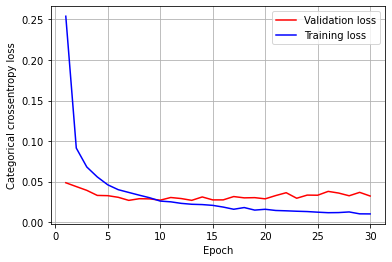

In [123]:
fig , ax = plt.subplots(1,1)
ax.set_xlabel('Epoch')
ax.set_ylabel('Categorical crossentropy loss')

x = list(range(1,31))

vy = history.history['val_loss']
ty = history.history['loss']
ax.plot(x,vy,'r',label = 'Validation loss')
ax.plot(x,ty,'b',label = 'Training loss')
plt.legend()
plt.grid()

In [125]:
mnist_table.add_row(["CNN ",3,"ReLu","ADAM",9,0.99,0.03,0.02])
print(mnist_table)

+-------------------------+---------+------------+-----------+--------+----------+----------------+------------------+
|          Model          | #Layers | Activation | optimizer | Epochs | Accuracy | Training Error | Validation error |
+-------------------------+---------+------------+-----------+--------+----------+----------------+------------------+
|    Softmax Regression   |    0    |  Softmax   |    SGD    |   50   |  0.917   |     0.309      |      0.298       |
|    Softmax Regression   |    0    |  Softmax   |    ADAM   |   4    |   0.92   |      0.27      |       0.27       |
|           MLP           |    2    |  Sigmoid   |    SGD    |   80   |  0.917   |     0.288      |      0.277       |
|           MLP           |    3    |  Sigmoid   |    SGD    |   80   |   0.9    |      0.34      |       0.33       |
|           MLP           |    3    |  Sigmoid   |    Adam   |   3    |   0.95   |      0.14      |       0.14       |
|           MLP           |    3    |    ReLu   

### <font color='red'> From the table we can infer that for MNIST dataset, CNN is the best model as we can attain 0.99 accuracy with a train error of 0.03 and validation error of 0.02 </font>

## CIFAR 10

### Data Preprocessing

In [140]:
# Loading the dataset
(X_train,Y_train),(X_test,Y_test) = cifar10.load_data()

In [141]:
# The shape of train and test data
print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

(50000, 32, 32, 3)
(50000, 1)
(10000, 32, 32, 3)
(10000, 1)


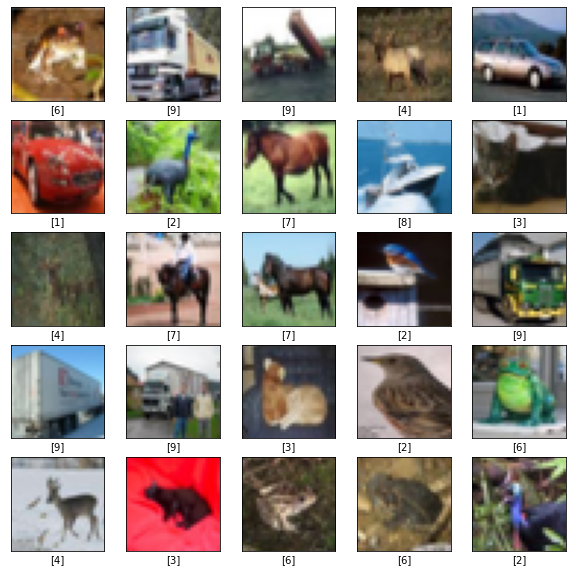

In [143]:
#Plooting few images with their class labels
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_train[i], cmap=plt.cm.binary)
    plt.xlabel(Y_train[i])
plt.show()

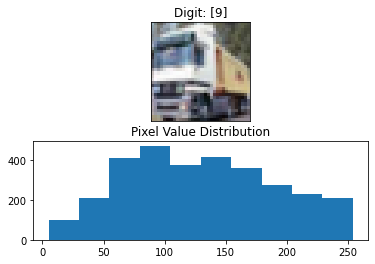

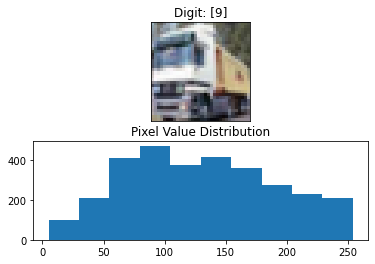

In [144]:
#Pixel distribution of an image
fig = plt.figure()
plt.subplot(2,1,1)
plt.imshow(X_train[1], cmap=plt.cm.binary, interpolation='none')
plt.title("Digit: {}".format(Y_train[1]))
plt.xticks([])
plt.yticks([])
plt.subplot(2,1,2)
plt.hist(X_train[1].reshape(3072))
plt.title("Pixel Value Distribution")
fig

In [147]:
batch_size = 128
num_classes = 10 
epochs = 20
#input_shape = X_train.shape[1]

#Normalizing the data
X_train = X_train/255
X_test = X_test/255

#One hot encoding the class labels
Y_train = keras.utils.to_categorical(Y_train,num_classes)
Y_test = keras.utils.to_categorical(Y_test,num_classes)

# SoftMax Classifier

In [170]:
#define the model
model_sgd = Sequential()

# Flatten the input image
model_sgd.add(Flatten(input_shape=X_train.shape[1:]))

# Output layer with 10 classes and softmax activation
model_sgd.add(Dense(num_classes, activation = 'softmax'))

#Compile the model 
model_sgd.compile(optimizer='sgd',loss='categorical_crossentropy',metrics=['accuracy'])

#fitting the data into the model
history = model_sgd.fit(X_train,Y_train,batch_size=batch_size,epochs=epochs,verbose=1,validation_data=(X_test,Y_test))

Epoch 1/20
391/391 [==============================] - 1s 3ms/step - loss: 2.0060 - accuracy: 0.2785 - val_loss: 1.9429 - val_accuracy: 0.2948
Epoch 2/20
391/391 [==============================] - 1s 2ms/step - loss: 1.8751 - accuracy: 0.3433 - val_loss: 1.8497 - val_accuracy: 0.3521
Epoch 3/20
391/391 [==============================] - 1s 2ms/step - loss: 1.8352 - accuracy: 0.3610 - val_loss: 1.8293 - val_accuracy: 0.3640
Epoch 4/20
391/391 [==============================] - 1s 2ms/step - loss: 1.8142 - accuracy: 0.3693 - val_loss: 1.8130 - val_accuracy: 0.3709
Epoch 5/20
391/391 [==============================] - 1s 2ms/step - loss: 1.7986 - accuracy: 0.3777 - val_loss: 1.8091 - val_accuracy: 0.3687
Epoch 6/20
391/391 [==============================] - 1s 2ms/step - loss: 1.7886 - accuracy: 0.3795 - val_loss: 1.7924 - val_accuracy: 0.3769
Epoch 7/20
391/391 [==============================] - 1s 2ms/step - loss: 1.7776 - accuracy: 0.3839 - val_loss: 1.7935 - val_accuracy: 0.3699
Epoch 

313/313 [==============================] - 0s 682us/step - loss: 1.8071 - accuracy: 0.3761
Test score: 1.807129144668579
Test accuracy: 0.37610000371932983


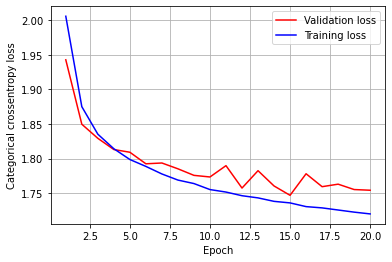

In [171]:
score = model.evaluate(X_test,Y_test) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])


fig , ax = plt.subplots(1,1)
ax.set_xlabel('Epoch')
ax.set_ylabel('Categorical crossentropy loss')

x = list(range(1,epochs+1))

vy = history.history['val_loss']
ty = history.history['loss']
ax.plot(x,vy,'r',label = 'Validation loss')
ax.plot(x,ty,'b',label = 'Training loss')
plt.legend()
plt.grid()

In [172]:
cifar_table = PrettyTable()

cifar_table.field_names = ["Model","# Layers","Activation","optimizer","Epochs","Accuracy","Training Error","Validation error",]
cifar_table.add_row(["Softmax ",0,"softmax","SGD",4,0.36,1.814,1.813])
print(cifar_table)

+----------+----------+------------+-----------+--------+----------+----------------+------------------+
|  Model   | # Layers | Activation | optimizer | Epochs | Accuracy | Training Error | Validation error |
+----------+----------+------------+-----------+--------+----------+----------------+------------------+
| Softmax  |    0     |  softmax   |    SGD    |   4    |   0.36   |     1.814      |      1.813       |
+----------+----------+------------+-----------+--------+----------+----------------+------------------+


#### <font color='green'> The accuarcy is very less (approximately 0.36) for a simple Softmax Layer with sgd optimizer, after that we can see that the model starts to overfit. We will change the optimizer to adam and observe if there's any change </font>

In [174]:
#define the model
model = Sequential()

# Flatten the input image
model.add(Flatten(input_shape=X_train.shape[1:]))

# Output layer with 10 classes and softmax activation
model.add(Dense(num_classes, activation = 'softmax'))

#Compile the model 
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

#fitting the data into the model
history = model.fit(X_train,Y_train,batch_size=batch_size,epochs=epochs,verbose=1,validation_data=(X_test,Y_test))

Epoch 1/20
391/391 [==============================] - 1s 3ms/step - loss: 1.9440 - accuracy: 0.3107 - val_loss: 1.9109 - val_accuracy: 0.3227
Epoch 2/20
391/391 [==============================] - 1s 2ms/step - loss: 1.8296 - accuracy: 0.3592 - val_loss: 1.7884 - val_accuracy: 0.3682
Epoch 3/20
391/391 [==============================] - 1s 2ms/step - loss: 1.7959 - accuracy: 0.3760 - val_loss: 1.7904 - val_accuracy: 0.3720
Epoch 4/20
391/391 [==============================] - 1s 3ms/step - loss: 1.7857 - accuracy: 0.3818 - val_loss: 1.7745 - val_accuracy: 0.3770
Epoch 5/20
391/391 [==============================] - 1s 2ms/step - loss: 1.7671 - accuracy: 0.3904 - val_loss: 1.7930 - val_accuracy: 0.3634
Epoch 6/20
391/391 [==============================] - 1s 2ms/step - loss: 1.7631 - accuracy: 0.3904 - val_loss: 1.8150 - val_accuracy: 0.3703
Epoch 7/20
391/391 [==============================] - 1s 2ms/step - loss: 1.7562 - accuracy: 0.3909 - val_loss: 1.7504 - val_accuracy: 0.3903
Epoch 

313/313 [==============================] - 0s 784us/step - loss: 1.7559 - accuracy: 0.3861
Test score: 1.7558742761611938
Test accuracy: 0.38609999418258667


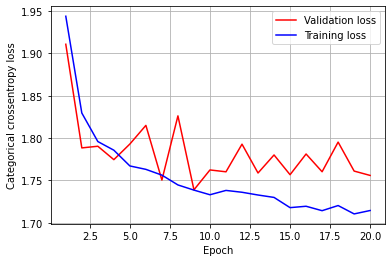

In [175]:
score = model.evaluate(X_test,Y_test) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])


fig , ax = plt.subplots(1,1)
ax.set_xlabel('Epoch')
ax.set_ylabel('Categorical crossentropy loss')

x = list(range(1,epochs+1))

vy = history.history['val_loss']
ty = history.history['loss']
ax.plot(x,vy,'r',label = 'Validation loss')
ax.plot(x,ty,'b',label = 'Training loss')
plt.legend()
plt.grid()

In [177]:
cifar_table.add_row(["Softmax ",0,"softmax","ADAM",4,0.387,1.78,1.77])
print(cifar_table)

+----------+----------+------------+-----------+--------+----------+----------------+------------------+
|  Model   | # Layers | Activation | optimizer | Epochs | Accuracy | Training Error | Validation error |
+----------+----------+------------+-----------+--------+----------+----------------+------------------+
| Softmax  |    0     |  softmax   |    SGD    |   4    |   0.36   |     1.814      |      1.813       |
| Softmax  |    0     |  softmax   |    ADAM   |   4    |  0.387   |      1.78      |       1.77       |
+----------+----------+------------+-----------+--------+----------+----------------+------------------+


#### <font color='green'> The accuarcy is very less (approximately 0.38) for a simple Softmax Layer with adam optimizer, after that we can see that the model starts to overfit. We will see if MLP can increase the accuracy </font>

 <h2> MLP </h2>
 <h3>  MLP - (3072 - 2048 - 1024 - 512 - 256 - 10) with Sigmoid activation  and SGDOptimizer) </h3>

In [159]:
model_sigmoid = Sequential()

model_sigmoid.add(Flatten(input_shape= X_train.shape[1:]))
#Layer 1
model_sigmoid.add(Dense(2048,activation='sigmoid'))

#Layer 2
model_sigmoid.add(Dense(1024,activation='sigmoid'))

#Layer 3
model_sigmoid.add(Dense(512,activation = 'sigmoid'))

#Layer 4
model_sigmoid.add(Dense(256,activation = 'sigmoid'))

#Output Layer
model_sigmoid.add(Dense(num_classes,activation='softmax'))

model_sigmoid.summary()

#compiling and fitting the model

model_sigmoid.compile(optimizer='sgd',loss='categorical_crossentropy',metrics=['accuracy'])

history = model_sigmoid.fit(X_train,Y_train,batch_size=batch_size,epochs=epochs,validation_data=(X_test,Y_test),verbose=1)

Model: "sequential_27"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_9 (Flatten)          (None, 3072)              0         
_________________________________________________________________
dense_65 (Dense)             (None, 2048)              6293504   
_________________________________________________________________
dense_66 (Dense)             (None, 1024)              2098176   
_________________________________________________________________
dense_67 (Dense)             (None, 512)               524800    
_________________________________________________________________
dense_68 (Dense)             (None, 256)               131328    
_________________________________________________________________
dense_69 (Dense)             (None, 10)                2570      
Total params: 9,050,378
Trainable params: 9,050,378
Non-trainable params: 0
___________________________________________

313/313 [==============================] - 3s 9ms/step - loss: 2.2885 - accuracy: 0.1350
Test score: 2.288544178009033
Test accuracy: 0.13500000536441803


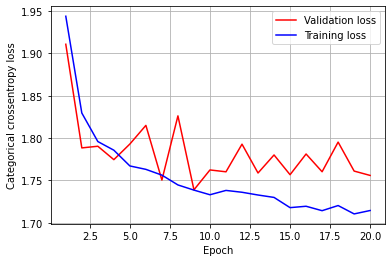

In [178]:
score = model_sigmoid.evaluate(X_test,Y_test) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])


fig , ax = plt.subplots(1,1)
ax.set_xlabel('Epoch')
ax.set_ylabel('Categorical crossentropy loss')

x = list(range(1,epochs+1))

vy = history.history['val_loss']
ty = history.history['loss']
ax.plot(x,vy,'r',label = 'Validation loss')
ax.plot(x,ty,'b',label = 'Training loss')
plt.legend()
plt.grid()

In [183]:
cifar_table.add_row(["MLP ",4,"Sigmoid","SGD",20,0.14,2.289,2.288])
print(cifar_table)

+----------+----------+------------+-----------+--------+----------+----------------+------------------+
|  Model   | # Layers | Activation | optimizer | Epochs | Accuracy | Training Error | Validation error |
+----------+----------+------------+-----------+--------+----------+----------------+------------------+
| Softmax  |    0     |  softmax   |    SGD    |   4    |   0.36   |     1.814      |      1.813       |
| Softmax  |    0     |  softmax   |    ADAM   |   4    |  0.387   |      1.78      |       1.77       |
|   MLP    |    4     |  Sigmoid   |    SGD    |   20   |   0.14   |     2.289      |      2.288       |
+----------+----------+------------+-----------+--------+----------+----------------+------------------+


#### <font color='green'> The accuarcy is very less (approximately 0.14) for a MLP layer with sigmoid activation and SGD optimizer</font>

<h3>  MLP - (3072 - 2048 - 1024 - 512 - 256 - 10) with ReLu activation  and Adam optimizer </h3>

In [161]:
#initialize the model


model_relu_adam = Sequential()

model_relu_adam.add(Flatten(input_shape= X_train.shape[1:]))
#Layer 1 
model_relu_adam.add(Dense(2048,activation = 'relu',kernel_initializer = he_normal(seed = 1)))

#Layer 2
model_relu_adam.add(Dense(1024,activation = 'relu',kernel_initializer = he_normal(seed = 1)))

#Layer 3
model_relu_adam.add(Dense(512,activation = 'relu',kernel_initializer= he_normal(seed = 1)))

#Layer 4
model_relu_adam.add(Dense(256,activation = 'relu',kernel_initializer = he_normal(seed = 1)))

#output Layer 
model_relu_adam.add(Dense(num_classes,activation = 'softmax'))

model_relu_adam.summary()

#Compiling and fitting the data into the model

model_relu_adam.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model_relu_adam.fit(X_train, Y_train, batch_size=batch_size, epochs=epochs, verbose=1, validation_data=(X_test, Y_test))

Model: "sequential_28"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_10 (Flatten)         (None, 3072)              0         
_________________________________________________________________
dense_70 (Dense)             (None, 2048)              6293504   
_________________________________________________________________
dense_71 (Dense)             (None, 1024)              2098176   
_________________________________________________________________
dense_72 (Dense)             (None, 512)               524800    
_________________________________________________________________
dense_73 (Dense)             (None, 256)               131328    
_________________________________________________________________
dense_74 (Dense)             (None, 10)                2570      
Total params: 9,050,378
Trainable params: 9,050,378
Non-trainable params: 0
___________________________________________

313/313 [==============================] - 5s 15ms/step - loss: 1.5062 - accuracy: 0.5201
Test score: 1.506154179573059
Test accuracy: 0.5200999975204468


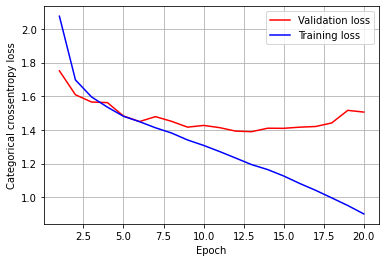

In [162]:
score = model_relu_adam.evaluate(X_test,Y_test) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])


fig , ax = plt.subplots(1,1)
ax.set_xlabel('Epoch')
ax.set_ylabel('Categorical crossentropy loss')

x = list(range(1,epochs+1))

vy = history.history['val_loss']
ty = history.history['loss']
ax.plot(x,vy,'r',label = 'Validation loss')
ax.plot(x,ty,'b',label = 'Training loss')
plt.legend()
plt.grid()

In [184]:
cifar_table.add_row(["MLP ",4,"ReLu","ADAM",5,0.471,1.48,1.48])
print(cifar_table)

+----------+----------+------------+-----------+--------+----------+----------------+------------------+
|  Model   | # Layers | Activation | optimizer | Epochs | Accuracy | Training Error | Validation error |
+----------+----------+------------+-----------+--------+----------+----------------+------------------+
| Softmax  |    0     |  softmax   |    SGD    |   4    |   0.36   |     1.814      |      1.813       |
| Softmax  |    0     |  softmax   |    ADAM   |   4    |  0.387   |      1.78      |       1.77       |
|   MLP    |    4     |  Sigmoid   |    SGD    |   20   |   0.14   |     2.289      |      2.288       |
|   MLP    |    4     |    ReLu    |    ADAM   |   5    |  0.471   |      1.48      |       1.48       |
+----------+----------+------------+-----------+--------+----------+----------------+------------------+


#### <font color='green'> The accuarcy for MLP with ReLu activation and ADAM optimizer is 0.471 for a MLP layer with ReLu activation and SGD optimizer which is much better than the previous models</font>

<h3>  MLP - (3072 - 2048 - 1024 - 512 - 256 - 10) with Batch Normalization, ReLu activation  and Adam optimizer </h3>

In [167]:
#initialize the model
model_batch = Sequential()

model_batch.add(Flatten(input_shape= X_train.shape[1:]))
#Layer 1 
model_batch.add(Dense(2048,activation = 'relu',kernel_initializer = he_normal()))
model_batch.add(BatchNormalization())


#Layer 2
model_batch.add(Dense(1024,activation = 'relu',kernel_initializer = he_normal()))
#Adding Batch normalization
model_batch.add(BatchNormalization())


#Layer 3
model_batch.add(Dense(512,activation = 'relu',kernel_initializer= he_normal()))
#Adding Batch normalization
model_batch.add(BatchNormalization())


#Layer 4
model_batch.add(Dense(256,activation = 'relu',kernel_initializer = he_normal()))
#Adding Batch normalization
model_batch.add(BatchNormalization())

#output Layer 
model_batch.add(Dense(num_classes,activation = 'softmax'))

model_batch.summary()

#Compiling and fitting the data into the model

model_batch.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model_batch.fit(X_train, Y_train, batch_size=batch_size, epochs=epochs, verbose=1, validation_data=(X_test, Y_test))

Model: "sequential_31"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_13 (Flatten)         (None, 3072)              0         
_________________________________________________________________
dense_85 (Dense)             (None, 2048)              6293504   
_________________________________________________________________
batch_normalization_14 (Batc (None, 2048)              8192      
_________________________________________________________________
dense_86 (Dense)             (None, 1024)              2098176   
_________________________________________________________________
batch_normalization_15 (Batc (None, 1024)              4096      
_________________________________________________________________
dense_87 (Dense)             (None, 512)               524800    
_________________________________________________________________
batch_normalization_16 (Batc (None, 512)             

313/313 [==============================] - 3s 9ms/step - loss: 2.2801 - accuracy: 0.4892
Test score: 2.2800698280334473
Test accuracy: 0.48919999599456787


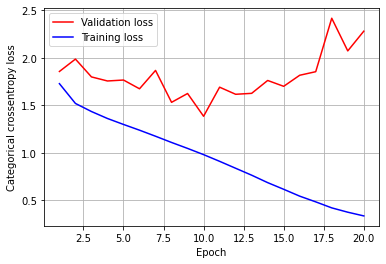

In [168]:
score = model_batch.evaluate(X_test,Y_test) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])


fig , ax = plt.subplots(1,1)
ax.set_xlabel('Epoch')
ax.set_ylabel('Categorical crossentropy loss')

x = list(range(1,epochs+1))

vy = history.history['val_loss']
ty = history.history['loss']
ax.plot(x,vy,'r',label = 'Validation loss')
ax.plot(x,ty,'b',label = 'Training loss')
plt.legend()
plt.grid()

In [191]:
cifar_table.add_row(["MLP - Batch Normalization",4,"ReLu","ADAM",1,0.38,1.7,1.8])
print(cifar_table)

+---------------------------+----------+------------+-----------+--------+----------+----------------+------------------+
|           Model           | # Layers | Activation | optimizer | Epochs | Accuracy | Training Error | Validation error |
+---------------------------+----------+------------+-----------+--------+----------+----------------+------------------+
|          Softmax          |    0     |  softmax   |    SGD    |   4    |   0.36   |     1.814      |      1.813       |
|          Softmax          |    0     |  softmax   |    ADAM   |   4    |  0.387   |      1.78      |       1.77       |
|            MLP            |    4     |  Sigmoid   |    SGD    |   20   |   0.14   |     2.289      |      2.288       |
|            MLP            |    4     |    ReLu    |    ADAM   |   5    |  0.471   |      1.48      |       1.48       |
| MLP - Batch Normalization |    4     |    ReLu    |    ADAM   |   1    |   0.38   |      1.7       |       1.8        |
+-----------------------

#### <font color='green'> The accuarcy attined for MLP - Batch Normalization is 0.38 for a MLP layer with ReLu activation and ADAM optimizer, we can see that the model is overfitting, so we will introduce dropouts and see if there's any change</font>

<h3>  MLP - (3072 - 2048 - 1024 -512 - 256 - 10) with Batch Normalization, Dropout, ReLu activation  and Adam optimizer </h3>

In [193]:
#initialize the model

model_batch_drop = Sequential()

model_batch_drop.add(Flatten(input_shape= X_train.shape[1:]))

#Layer 1 
model_batch_drop.add(Dense(2048,activation = 'relu',kernel_initializer = he_normal(seed = 1)))
#Adding Batch normalization
model_batch_drop.add(BatchNormalization())
#Adding Dropout layer
model_batch_drop.add(Dropout(0.5))

#Layer 2
model_batch_drop.add(Dense(1024,activation = 'relu',kernel_initializer = he_normal(seed = 1)))
#Adding Batch normalization
model_batch_drop.add(BatchNormalization())
#Adding Dropout layer
model_batch_drop.add(Dropout(0.5))


#Layer 3 
model_batch_drop.add(Dense(512,activation = 'relu',kernel_initializer= he_normal(seed = 1)))
#Adding Batch normalization
model_batch_drop.add(BatchNormalization())
#Adding Dropout layer
model_batch_drop.add(Dropout(0.5))


#Layer 4
model_batch_drop.add(Dense(256,activation = 'relu',kernel_initializer = he_normal(seed = 1)))
#Adding Batch normalization
model_batch_drop.add(BatchNormalization())
#Adding Dropout layer
model_batch_drop.add(Dropout(0.5))

#output Layer 
model_batch_drop.add(Dense(num_classes,activation = 'softmax'))

model_batch_drop.summary()

#Compiling and fitting the data into the model

model_batch_drop.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model_batch_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=40, verbose=1, validation_data=(X_test, Y_test))


Model: "sequential_35"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_17 (Flatten)         (None, 3072)              0         
_________________________________________________________________
dense_92 (Dense)             (None, 2048)              6293504   
_________________________________________________________________
batch_normalization_18 (Batc (None, 2048)              8192      
_________________________________________________________________
dropout_11 (Dropout)         (None, 2048)              0         
_________________________________________________________________
dense_93 (Dense)             (None, 1024)              2098176   
_________________________________________________________________
batch_normalization_19 (Batc (None, 1024)              4096      
_________________________________________________________________
dropout_12 (Dropout)         (None, 1024)            

313/313 [==============================] - 3s 10ms/step - loss: 1.3792 - accuracy: 0.5057
Test score: 1.3791841268539429
Test accuracy: 0.5056999921798706


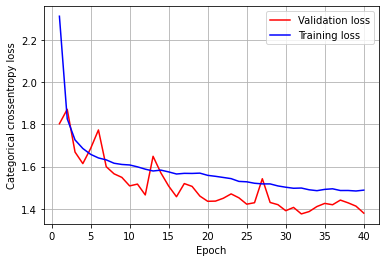

In [195]:
score = model_batch_drop.evaluate(X_test,Y_test) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])


fig , ax = plt.subplots(1,1)
ax.set_xlabel('Epoch')
ax.set_ylabel('Categorical crossentropy loss')

x = list(range(1,41))

vy = history.history['val_loss']
ty = history.history['loss']
ax.plot(x,vy,'r',label = 'Validation loss')
ax.plot(x,ty,'b',label = 'Training loss')
plt.legend()
plt.grid()

In [200]:
cifar_table.add_row(["MLP-BN-Dropout ",4,"ReLu","ADAM",40,0.470,1.488,1.379])
print(cifar_table)

+---------------------------+----------+------------+-----------+--------+----------+----------------+------------------+
|           Model           | # Layers | Activation | optimizer | Epochs | Accuracy | Training Error | Validation error |
+---------------------------+----------+------------+-----------+--------+----------+----------------+------------------+
|          Softmax          |    0     |  softmax   |    SGD    |   4    |   0.36   |     1.814      |      1.813       |
|          Softmax          |    0     |  softmax   |    ADAM   |   4    |  0.387   |      1.78      |       1.77       |
|            MLP            |    4     |  Sigmoid   |    SGD    |   20   |   0.14   |     2.289      |      2.288       |
|            MLP            |    4     |    ReLu    |    ADAM   |   5    |  0.471   |      1.48      |       1.48       |
| MLP - Batch Normalization |    4     |    ReLu    |    ADAM   |   1    |   0.38   |      1.7       |       1.8        |
|      MLP-BN-Dropout   

#### <font color='green'> The accuarcy for MLP with ReLu activation and ADAM optimizer is 0.471 for a MLP layer with ReLu activation and SGD optimizer which is much better than the previous model</font>

#### We can see that the model stopped overfitting, however, the accuracy is very less using Softmax and MLP, so, we will use CNN to notice if there will be any changes.

## CNN

### CNN on CIFAR 10

In [203]:
(X_train, Y_train), (X_test, Y_test) = cifar10.load_data()
print("The shape of x_train is ",X_train.shape)
print("The shape of y_train is ",Y_train.shape)
print("The shape of x_test is ",X_test.shape)
print("The shape of y_test is ",Y_test.shape)

    
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255
print('x_train shape:', X_train.shape)
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')

# convert class vectors to binary class matrices
Y_train = keras.utils.to_categorical(Y_train, num_classes)
Y_test = keras.utils.to_categorical(Y_test, num_classes)

The shape of x_train is  (50000, 32, 32, 3)
The shape of y_train is  (50000, 1)
The shape of x_test is  (10000, 32, 32, 3)
The shape of y_test is  (10000, 1)
x_train shape: (50000, 32, 32, 3)
50000 train samples
10000 test samples


In [205]:
#Initialize the model
model = Sequential()

# Adding a convolutionlayer with 3x3 kernels and 32 filters 
model.add(Conv2D(32, kernel_size=(3, 3),activation='relu',input_shape=(32,32,3),padding ='same'))

# Adding a convolutionlayer with 3x3 kernels and 32 filters
model.add(Conv2D(64, (3, 3), activation='relu',padding ='same'))

# Adding a Maxpooling layer
model.add(MaxPooling2D(pool_size=(2, 2)))

# Adding a dropout value
model.add(Dropout(0.25))


model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,optimizer=keras.optimizers.Adam(),metrics=['accuracy'])

history = model.fit(X_train, Y_train,batch_size=batch_size,epochs=5,verbose=1,validation_data=(X_test, Y_test))
score = model.evaluate(X_test, Y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Epoch 1/5
391/391 [==============================] - 114s 293ms/step - loss: 1.4680 - accuracy: 0.4719 - val_loss: 1.1434 - val_accuracy: 0.5917
Epoch 2/5
391/391 [==============================] - 116s 297ms/step - loss: 1.0489 - accuracy: 0.6266 - val_loss: 0.9797 - val_accuracy: 0.6571
Epoch 3/5
391/391 [==============================] - 116s 297ms/step - loss: 0.8758 - accuracy: 0.6927 - val_loss: 0.9141 - val_accuracy: 0.6761
Epoch 4/5
391/391 [==============================] - 114s 292ms/step - loss: 0.7374 - accuracy: 0.7419 - val_loss: 0.8586 - val_accuracy: 0.7012
Epoch 5/5
391/391 [==============================] - 111s 284ms/step - loss: 0.6099 - accuracy: 0.7847 - val_loss: 0.8419 - val_accuracy: 0.7123
Test loss: 0.8419044017791748
Test accuracy: 0.7123000025749207


313/313 [==============================] - 7s 22ms/step - loss: 0.8970 - accuracy: 0.7052 0s - loss: 0.8951 - accuracy: 0. - ETA: 0s - loss: 0.8948 - accuracy: 
Test score: 0.8970457315444946
Test accuracy: 0.7052000164985657


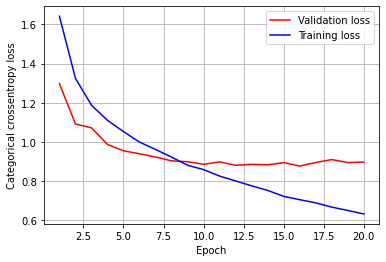

In [85]:
score = model.evaluate(X_test,Y_test) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])


fig , ax = plt.subplots(1,1)
ax.set_xlabel('Epoch')
ax.set_ylabel('Categorical crossentropy loss')

x = list(range(1,epochs+1 ))

vy = history.history['val_loss']
ty = history.history['loss']
ax.plot(x,vy,'r',label = 'Validation loss')
ax.plot(x,ty,'b',label = 'Training loss')
plt.legend()
plt.grid()

In [206]:
cifar_table.add_row(["CNN with (3,3) kernels",2,"ReLu","ADAM",2,0.626,1.048,0.979])
print(cifar_table)

+---------------------------+----------+------------+-----------+--------+----------+----------------+------------------+
|           Model           | # Layers | Activation | optimizer | Epochs | Accuracy | Training Error | Validation error |
+---------------------------+----------+------------+-----------+--------+----------+----------------+------------------+
|          Softmax          |    0     |  softmax   |    SGD    |   4    |   0.36   |     1.814      |      1.813       |
|          Softmax          |    0     |  softmax   |    ADAM   |   4    |  0.387   |      1.78      |       1.77       |
|            MLP            |    4     |  Sigmoid   |    SGD    |   20   |   0.14   |     2.289      |      2.288       |
|            MLP            |    4     |    ReLu    |    ADAM   |   5    |  0.471   |      1.48      |       1.48       |
| MLP - Batch Normalization |    4     |    ReLu    |    ADAM   |   1    |   0.38   |      1.7       |       1.8        |
|      MLP-BN-Dropout   

In [207]:
#Initialize the model
model = Sequential()

# Adding a convolutionlayer with 3x3 kernels and 32 filters 
model.add(Conv2D(32, kernel_size=(5,5),activation='relu',input_shape=(32,32,3),padding ='same'))

# Adding a convolutionlayer with 3x3 kernels and 32 filters
model.add(Conv2D(64, (5,5), activation='relu',padding ='same'))

# Adding a Maxpooling layer
model.add(MaxPooling2D(pool_size=(2, 2)))

# Adding a dropout value
model.add(Dropout(0.25))


model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,optimizer=keras.optimizers.Adam(),metrics=['accuracy'])

history = model.fit(X_train, Y_train,batch_size=batch_size,epochs=5,verbose=1,validation_data=(X_test, Y_test))
score = model.evaluate(X_test, Y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Epoch 1/5
391/391 [==============================] - 180s 461ms/step - loss: 1.5107 - accuracy: 0.4548 - val_loss: 1.1882 - val_accuracy: 0.5787
Epoch 2/5
391/391 [==============================] - 200s 513ms/step - loss: 1.1481 - accuracy: 0.5928 - val_loss: 1.0508 - val_accuracy: 0.6332
Epoch 3/5
391/391 [==============================] - 202s 516ms/step - loss: 0.9751 - accuracy: 0.6576 - val_loss: 0.9722 - val_accuracy: 0.6619
Epoch 4/5
391/391 [==============================] - 201s 515ms/step - loss: 0.8361 - accuracy: 0.7084 - val_loss: 0.9211 - val_accuracy: 0.6802
Epoch 5/5
391/391 [==============================] - 202s 516ms/step - loss: 0.7116 - accuracy: 0.7523 - val_loss: 0.8934 - val_accuracy: 0.6915
Test loss: 0.8934043049812317
Test accuracy: 0.6915000081062317


313/313 [==============================] - 8s 26ms/step - loss: 0.8934 - accuracy: 0.6915
Test score: 0.8934043049812317
Test accuracy: 0.6915000081062317


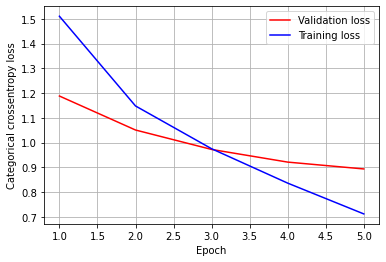

In [209]:
score = model.evaluate(X_test,Y_test) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])


fig , ax = plt.subplots(1,1)
ax.set_xlabel('Epoch')
ax.set_ylabel('Categorical crossentropy loss')

x = list(range(1,6 ))

vy = history.history['val_loss']
ty = history.history['loss']
ax.plot(x,vy,'r',label = 'Validation loss')
ax.plot(x,ty,'b',label = 'Training loss')
plt.legend()
plt.grid()

In [210]:
cifar_table.add_row(["CNN with (5,5) kernels",2,"ReLu","ADAM",3,0.657,0.975,0.972])
print(cifar_table)

+---------------------------+----------+------------+-----------+--------+----------+----------------+------------------+
|           Model           | # Layers | Activation | optimizer | Epochs | Accuracy | Training Error | Validation error |
+---------------------------+----------+------------+-----------+--------+----------+----------------+------------------+
|          Softmax          |    0     |  softmax   |    SGD    |   4    |   0.36   |     1.814      |      1.813       |
|          Softmax          |    0     |  softmax   |    ADAM   |   4    |  0.387   |      1.78      |       1.77       |
|            MLP            |    4     |  Sigmoid   |    SGD    |   20   |   0.14   |     2.289      |      2.288       |
|            MLP            |    4     |    ReLu    |    ADAM   |   5    |  0.471   |      1.48      |       1.48       |
| MLP - Batch Normalization |    4     |    ReLu    |    ADAM   |   1    |   0.38   |      1.7       |       1.8        |
|      MLP-BN-Dropout   

In [213]:
#Initialize the model
model = Sequential()

# Adding a convolutionlayer with 3x3 kernels and 32 filters 
model.add(Conv2D(16, kernel_size=(2,2),activation='relu',input_shape=(32,32,3),padding ='same'))

# Adding a convolutionlayer with 3x3 kernels and 32 filters
model.add(Conv2D(32, (2,2), activation='relu',padding ='same'))

# Adding a Maxpooling layer
model.add(MaxPooling2D(pool_size=(2, 2)))

# Adding a convolutionlayer with 3x3 kernels and 32 filters
model.add(Conv2D(64, (4,4), activation='relu',padding ='same'))

# Adding a Maxpooling layer
model.add(MaxPooling2D(pool_size=(2, 2)))

# Adding a convolutionlayer with 3x3 kernels and 32 filters
model.add(Conv2D(128, (4,4), activation='relu',padding ='same'))


# Adding a Maxpooling layer
model.add(MaxPooling2D(pool_size=(2, 2)))

# Adding a dropout value
model.add(Dropout(0.25))


model.add(Flatten())
model.add(Dropout(0.3))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(num_classes, activation='softmax'))

model.summary()
model.compile(loss=keras.losses.categorical_crossentropy,optimizer=keras.optimizers.Adam(),metrics=['accuracy'])

history = model.fit(X_train, Y_train,batch_size=batch_size,epochs=8,verbose=1,validation_data=(X_test, Y_test))
score = model.evaluate(X_test, Y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Model: "sequential_42"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_19 (Conv2D)           (None, 32, 32, 16)        208       
_________________________________________________________________
conv2d_20 (Conv2D)           (None, 32, 32, 32)        2080      
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_21 (Conv2D)           (None, 16, 16, 64)        32832     
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 8, 8, 64)          0         
_________________________________________________________________
conv2d_22 (Conv2D)           (None, 8, 8, 128)         131200    
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 4, 4, 128)       

313/313 [==============================] - 4s 12ms/step - loss: 0.6387 - accuracy: 0.7753
Test score: 0.6387430429458618
Test accuracy: 0.7753000259399414


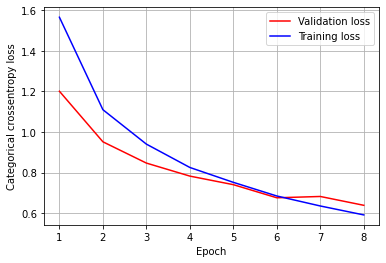

In [214]:
score = model.evaluate(X_test,Y_test) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])


fig , ax = plt.subplots(1,1)
ax.set_xlabel('Epoch')
ax.set_ylabel('Categorical crossentropy loss')

x = list(range(1,9))

vy = history.history['val_loss']
ty = history.history['loss']
ax.plot(x,vy,'r',label = 'Validation loss')
ax.plot(x,ty,'b',label = 'Training loss')
plt.legend()
plt.grid()

In [216]:
cifar_table.add_row(["CNN with multiple kernels",5,"ReLu","ADAM",6,0.758,0.684,0.675])
print(cifar_table)

+---------------------------+----------+------------+-----------+--------+----------+----------------+------------------+
|           Model           | # Layers | Activation | optimizer | Epochs | Accuracy | Training Error | Validation error |
+---------------------------+----------+------------+-----------+--------+----------+----------------+------------------+
|          Softmax          |    0     |  softmax   |    SGD    |   4    |   0.36   |     1.814      |      1.813       |
|          Softmax          |    0     |  softmax   |    ADAM   |   4    |  0.387   |      1.78      |       1.77       |
|            MLP            |    4     |  Sigmoid   |    SGD    |   20   |   0.14   |     2.289      |      2.288       |
|            MLP            |    4     |    ReLu    |    ADAM   |   5    |  0.471   |      1.48      |       1.48       |
| MLP - Batch Normalization |    4     |    ReLu    |    ADAM   |   1    |   0.38   |      1.7       |       1.8        |
|      MLP-BN-Dropout   

Note: In the Prettytable(), the score of the models are updated based on the accuracy score before the overfitting occured.

## 6. Results/Conclusion

Presented three different models (SoftMax regression, MLP and CNN) on MNIST and CIFAR-10 datasets for measuring the performance using categorical loss entropy as a loss measure. Among these three models, we can observe that the performance of CNNs outweighed MLP and SoftMax regression by a large margin. However, the accuracy score obtained on the CIFAR-10 dataset is lower than MNIST dataset.